# **Kız Başına Veri Analizi Bootcamp 1. Bitirme Projesi**

## **Amaç:**
3 haftalık bu proje kapsamında katılımcıların, gerçek bir veri seti kullanarak istatistiksel analiz, eksik veri incelemesi, aykırı değer tespiti ve görselleştirme adımlarını uygulayarak veri analizi becerilerini geliştirmeleri hedeflenmektedir.

## **Senaryo:**
Katılımcılar, aşağıda belirtilen iki veri setinden birini seçerek veri analizi sürecini yürütür. Bu analiz sürecinde sayısal ve kategorik değişkenler üzerinde uygun grafiklerle görselleştirme yapılır, eksik değerler ve aykırı veriler analiz edilir ve istatistiksel özetler oluşturulur.

Veri setlerinden biri şu şekilde seçilmelidir:

-  Dataset 1: Airline Passenger Satisfaction Dataset
-  Dataset 2: Customer Experience Dataset

## **Proje Gereklilikleri**

### **1. Veri Seti Seçimi Katılımcı, yukarıdaki iki veri setinden birini seçerek analiz çalışmalarına başlar.**


Seçilen Dataset : Airline Passenger Satisfaction

https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=train.csv

In [4]:
# Gerekli kütüphaneleri import edelim
import pandas as pd       # Pandas: Verinin analizi için gerekli 
import numpy as np        # Numpy: Matematiksel işlemler için gerekli bir kütüphanedir.

# Görselleştirme için gerekli kütüphaneleri import edelim
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno       # eksik verilerin görselleştirilmesi için gerekli bir kütüphane

In [5]:
# Veri setimizi import edelim

df = pd.read_csv("airline_train.csv")

In [6]:
# Veri setinin ilk 5 satırını görüntüleyelim

df.head()          # parantez içerisine hiçbir değer girilmezse default değeri 5'tir.

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
# Veri setinin son 5 satırını görüntüleyelim.

df.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [8]:
# Verinin değişkenlerini/ attributelarını getirelim.

df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

### Columnları açıklayalım:

- **Unnamed: 0**: Index değerleri tutmaktadır. (Model kurulacağı zaman bu sütunun modele doğrudan etkisi olmadığı için kaldırılabilir.)
- **id** : Yolcuların id numaralarıdır.
- **Gender** : Yolcuların cinsiyeti (Kadın, Erkek)
- **Customer Type** : Müşteri tipi (Sadık müşteri (Loyal Customer), Sadık olmayan müşteri(disloyel Customer))
- **Age** : Yolcuların gerçek yaşı
- **Type of Travel** : Uçuş amacı (Kişisel seyahat (Personal Travel), İş seyahati(Business travel))
- **Class** : Uçak içi seyahat sınıfı (Business, Ekonomi (Eco) , Ekonomi Plus (Eco Plus))
- **Flight Distance** : Bu yolculuğun uçuş mesafesi
- **Inflight wifi service** : Uçak içi Wi-Fi hizmetinden memnuniyet düzeyi (0, 1, 2, 3, 4, 5)
- **Departure/Arrival time convenient** : Kalkış/Varış saatlerinin uygunluğu memnuniyeti (0, 1, 2, 3, 4, 5)
- **Ease of Online booking** : Online rezervasyon kolaylığı memnuniyeti (0, 1, 2, 3, 4, 5)
- **Gate location** : Kapı konumu memnuniyeti  (0, 1, 2, 3, 4, 5)
- **Food and drink** : Yiyecek ve içecek hizmeti memnuniyeti (0, 1, 2, 3, 4, 5)
- **Online boarding** : Online biniş memnuniyeti (0, 1, 2, 3, 4, 5)
- **Seat comfort** : Koltuk konforu memnuniyeti (0, 1, 2, 3, 4, 5)
- **Inflight entertainment**: Uçak içi eğlence hizmeti memnuniyeti (0, 1, 2, 3, 4, 5)
- **On-board service** : Uçak içi genel hizmet memnuniyeti (0, 1, 2, 3, 4, 5)
- **Leg room service** : Bacak mesafesi hizmeti memnuniyeti (0, 1, 2, 3, 4, 5)
- **Baggage handling** : Bagaj hizmeti memnuniyeti (1, 2, 3, 4, 5)
- **Checkin service** : Check-in (kayıt) hizmeti memnuniyeti (0, 1, 2, 3, 4, 5)
- **Inflight service** : Uçuş sırasındaki hizmet memnuniyeti (0, 1, 2, 3, 4, 5)
- **Cleanliness** : Temizlik memnuniyeti (0, 1, 2, 3, 4, 5)
- **Departure Delay in Minutes** : Kalkıştaki gecikme süresi (dakika cinsinden)
- **Arrival Delay in Minutes** : Varıştaki gecikme süresi (dakika cinsinden)
- **Satisfaction** : Havayolu memnuniyet düzeyi (Memnun (satisfied), Nötr ya da Memnun değil (neutral or dissatisfied))

In [10]:
# Verinin kaç satır ve kaç sütundan oluştuğunu yazdıralım

df.shape

(103904, 25)

**Verimiz 103904 satır ve 25 sütundan oluşmaktadır.**

In [11]:
# Verinin index bilgilerine erişelim

df.index

RangeIndex(start=0, stop=103904, step=1)

In [12]:
# Her bir değişkenin değişken tipini getirelim.

df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [13]:
# Veri hakkında daha detaylı bilgi edinelim

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

#### Yorumlayalım:

- 103904 toplam gözlem sayısıdır.

- Verimiz 24 feature içermektedir.

- 1 float64 tipinde, 5 objects tipinde , 19 int64 tipinde verimiz bulunur.

- Verimizde eksik değerler bulunmaktadır. İlk izlenime göre Arrival Delay in Minutes sütununda eksik değer bulunmaktadır. İleride detaylıca bu kısıma değinilecektir.

### Veri setinin çerçevesindeki sütunları veri türlerine göre ayıralım.
### Kategorik sütunları cat_cols listesine, sayısal sütunları num_cols listesine yerleştirelim.

In [14]:
cat_cols = []                      # kategorik süütunları tutar
num_cols = []                      # numeric sütunları tutar.
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object"]]   # değişken tipi category veya object ise cat_cols'a ekleyelim
num_cols = [col for col in df.columns if df[col].dtypes in ["int64","float64"]]      # değişken tipi category veya object ise num_cols'a ekleyelim

In [15]:
cat_cols, num_cols

(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'],
 ['Unnamed: 0',
  'id',
  'Age',
  'Flight Distance',
  'Inflight wifi service',
  'Departure/Arrival time convenient',
  'Ease of Online booking',
  'Gate location',
  'Food and drink',
  'Online boarding',
  'Seat comfort',
  'Inflight entertainment',
  'On-board service',
  'Leg room service',
  'Baggage handling',
  'Checkin service',
  'Inflight service',
  'Cleanliness',
  'Departure Delay in Minutes',
  'Arrival Delay in Minutes'])

### **2. İstatistiksel Özet Veri setindeki değişkenlere dair merkezi eğilim (ortalama, medyan vb.) ve dağılım (standart sapma, minimum, maksimum vb.) istatistikleri raporlanır.**


In [16]:
# Verinin istatistiksel 

df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [17]:
# Transpozunu alalım. (Yukarıdaki formattan ziyade bu şekilde okumak ve yorumlamak daha kolay hale geliyor.)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


### Yorumlayalım:

Ortalama ve medyan değerleri birbirine yakın ise:

- Veriler simetrik olarak dağıtılır.
- Aykırı değerlerin düşük olduğunu gösterir.
- Bu tür dağılımda standart sapma genellikle düşüktür. Çünkü veriler ortalama etrafında daha yoğundur.

**Her bir değişken değerlerini yorumlayalım:**

- Unnamed: 0
    - mean : 51951.500000
    - median : 	51951.5
    - std : 29994.645522	
    - min : 0.0
    - max : 103903.0
    
(mean ≈ median → simetrik dağılım, std yüksek → geniş veri yayılımı, veri muhtemelen ID ya da sıra no; anlamlı analizlik değil)

- id 
    - mean : 64924.210502
    - median : 	64856.5
    - std : 37463.812252		
    - min : 1.0
    - max : 129880.0
    
(mean ≈ median → simetrik, std çok yüksek → bu da bir tanımlayıcı ID, analizlik değil)    
    
- Age 
    - mean : 39.379706	
    - median : 	40.0
    - std : 15.114964	
    - min : 7.0
    - max : 85.0
    
(mean ≈ median → simetrik dağılım, std orta seviye → yaşlar çok yayılmamış, aykırı değer düşük)
    
- Flight Distance 
    - mean : 1189.448375
    - median : 843.0
    - std : 997.147281	
    - min : 31.0	
    - max : 4983.0
    
(mean > median → sağa çarpık dağılım, yüksek std → uçuş mesafeleri değişken, aykırı değerler muhtemel)
    
- Inflight wifi service 
    - mean : 2.729683	
    - median : 	3.0
    - std : 1.327829	
    - min : 0.0
    - max : 5.0
    
(mean ≈ median → simetrik, ortalama düşük → genel memnuniyet ortalama altı)
    
- Departure/Arrival time convenient
    - mean : 3.060296
    - median : 3.0
    - std : 1.525075		
    - min : 0.0
    - max : 5.0

(mean ≈ median → simetrik, std orta → zaman uygunluğunda görüşler dağılmış)

- Ease of Online booking 
    - mean : 2.756901
    - median : 3.0
    - std : 1.398929	
    - min : 0.0
    - max : 5.0

(mean ≈ median → simetrik, memnuniyet ortalama, std orta seviye)
    
- Gate location
    - mean : 2.976883	
    - median : 	3.0
    - std : 1.277621		
    - min : 0.0
    - max : 5.0

(mean ≈ median → simetrik, memnuniyet nötr seviyede)
    
- Food and drink
    - mean : 3.202129	
    - median : 	3.0
    - std : 1.329533		
    - min : 0.0
    - max : 5.0
    
(mean > median → biraz sağa çarpık, memnuniyet hafif ortalamanın üstünde)
    
- Online boarding
    - mean : 3.250375	
    - median : 	3.0
    - std : 1.349509	
    - min : 0.0
    - max : 5.0
    
(mean > median → sağa çarpık dağılım, memnuniyet ortalama üstü, görüşler dağılmış)
    
- Seat comfort
    - mean : 3.439396	
    - median : 4.0
    - std : 1.319088	
    - min : 0.0
    - max : 5.0
    
(mean < median -> biraz sola çarpık, genel memnuniyet yüksek, std orta, az sayıda aykırı değer)
    
- Inflight entertainment:
    - mean : 3.358158
    - median : 4.0
    - std : 1.319088		
    - min : 0.0
    - max : 5.0
    
(mean < median -> biraz sola çarpık, genel memnuniyet yüksek, std orta, az sayıda aykırı değer)
 
- On-board service:
    - mean : 3.382363
    - median : 	4.0
    - std : 1.288354		
    - min : 0.0
    - max : 5.0
    
(mean < median → sola çarpık, genel memnuniyet yüksek, std orta)
    
- Leg room service 
    - mean : 3.351055	
    - median : 	4.0
    - std : 1.315605	
    - min : 0.0
    - max : 5.0
    
(mean < median → sola çarpık, memnuniyet genel olarak olumlu)
    
- Baggage handling 
    - mean : 3.631833		
    - median : 	4.0
    - std : 1.180903	
    - min : 0.0
    - max : 5.0
    
(mean < median → sola çarpık, memnuniyet yüksek, std düşük → yorumlar tutarlı)
    
- Checkin service 
    - mean : 3.304290
    - median : 	3.0
    - std : 1.265396	
    - min : 0.0
    - max : 5.0

(mean ≈ median → simetrik, memnuniyet nötr ile olumlu arasında)
    
- Inflight service 
    - mean : 3.640428	
    - median : 	4.0
    - std : 1.175663	
    - min : 0.0
    - max : 5.0
    
(mean < median → sola çarpık, yüksek memnuniyet, düşük aykırı değer olasılığı)
    
- Cleanliness
    - mean : 3.286351	
    - median : 	3.0
    - std : 1.312273	
    - min : 0.0
    - max : 5.0
    
(mean > median → sağa çarpık, temizlik memnuniyeti nötr-olumlu arası)
    
- Departure Delay in Minutes
    - mean : 14.815618
    - median : 	0.0
    - std : 38.230901		
    - min : 0.0
    - max : 1592.0
    
(mean ≫ median → aşırı sağa çarpık, birçok uçuş zamanında, ama bazıları çok gecikmiş → aykırı değer fazla)
    
- Arrival Delay in Minutes
    - mean : 15.178678	
    - median : 	0.0
    - std : 38.698682		
    - min : 0.0
    - max : 1584.0
    
(benzer şekilde aşırı sağa çarpık, çoğu zamanında varış, ancak bazı uçuşlar ciddi gecikmeli)


### **3. Eksik Değer Analizi Veri setindeki eksik değerlerin tespiti ve bu değerlerle ilgili uygulanabilecek yaklaşımlar açıklanır.**


Eksik veri analizi, bir veri kümesinde bulunan boş ya da eksik değerlerin incelenmesi ve bu durumun veri analizi sürecine etkilerinin değerlendirilmesini amaçlar. Eksik verilerin kaynağını anlamak, hangi yöntemin uygulanacağını belirlemek açısından kritik öneme sahiptir.

Bazı durumlarda eksik veriler, istatistiksel yöntemlerle doldurularak (örneğin ortalama, medyan, mod veya regresyon yöntemleriyle) tamamlanabilir. Ancak, eğer eksik verilerin sayısı fazla ve bu durum analiz sonuçlarını ciddi şekilde etkiliyorsa, bu veriler veri kümesinden çıkarılabilir. Hangi yöntemin seçileceği, eksik verilerin analizin doğruluğuna etkisi ve analizin amacına göre değişir

In [18]:
# Veride hangi sütunlarda eksik veri var? tespitini gerçekleştirelim.

df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [19]:
# verideki eksik değerlerin toplam sayısı 

df.isnull().sum().sum()

310

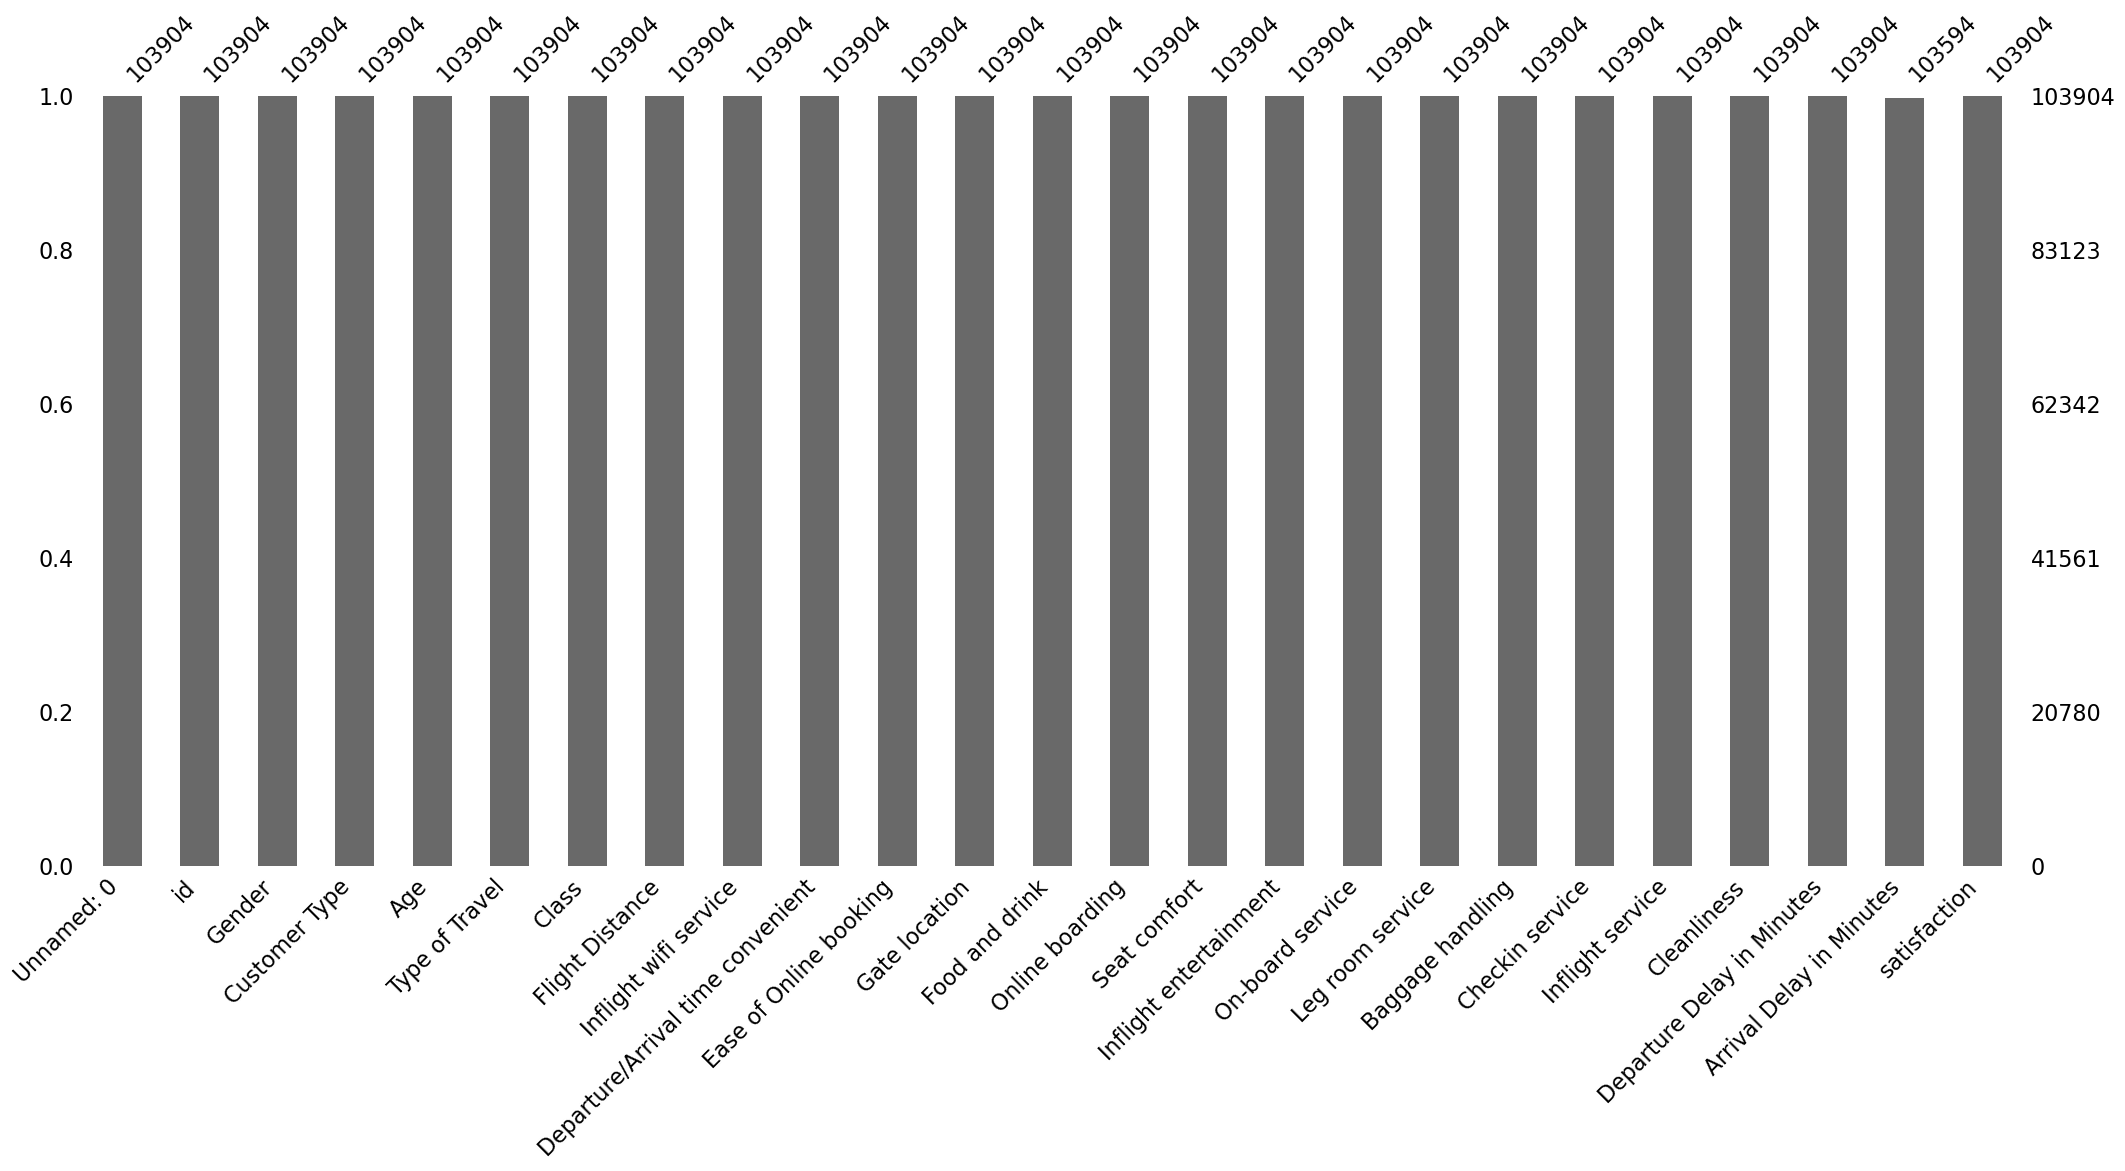

In [20]:
# missingno ile eksik veri bar grafiği

msno.bar(df)
plt.show()


### Yorumlayalım: 

**Grafiğe göre eksik değerlerin görselleştirilmesi yer almaktadır. "Arrival Delay in Minutes" sütununda eksik değer olduğu görülmektedir.**

**Eksik değer bulunan sütunlarımız aşağıdaki gibidir:**
- Arrival Delay in Minutes = 310 adet eksik verimiz bulunmaktadır.

In [21]:
# Her bir sütun için eksik oranı nedir?

# Her sütun için eksik veri oranı (satır sayısına göre)
missing_ratio = df.isnull().sum() / len(df)

# Yalnızca eksik verisi olan sütunları göster
missing_ratio = missing_ratio[missing_ratio > 0]

# Sonuçları yazdır
print("Oranlar")
print(missing_ratio.sort_values(ascending=False))

Oranlar
Arrival Delay in Minutes    0.002984
dtype: float64


**Eksik veri oran dağılımlarını inceleyecek olursak:**
    
- Arrival Delay in Minutes = 0.2984 %

olarak sütunlarımızda eksik değer dağılımlarını incelemekteyiz.

**Eksik veri oranı %70-%75 ve üzerinde olsaydı, model kurarken sıkıntı çıkarabilirdi. Bu sebeple veriden çıkartılması gerekirdi.**

**Ancak burada eksik veri oranımız düşük olduğundan kaynaklı doldurma işlemi uygulanabilir.**


### Eksik verileri doldururken şu yaklaşımlar kullanılabilir:


### SimpleImputer vs. KNNImputer


🔹 SimpleImputer (Basit Atama Yöntemi)
Nasıl çalışır?
Eksik değerleri sabit bir istatistikle doldurur:

strategy="mean" → ortalama ile doldurur

strategy="median" → medyan ile doldurur

strategy="most_frequent" → en sık görülen değer

strategy="constant" → sabit bir değer (örneğin "Bilinmiyor")

✅ Kullanım alanı:

Sayısal (numeric) değişkenlerde: mean, median

Kategorik (object/string) değişkenlerde: most_frequent, constant

📌 Avantajı: Hızlı ve basit
📌 Dezavantajı: Veri dağılımını dikkate almaz


<br>

🔹 KNNImputer (K-En Yakın Komşu ile Atama)
Nasıl çalışır?

Eksik değerleri, benzer (komşu) örneklerin ortalamasına göre tahmin eder.

k tane en yakın veri noktasını bulur (standart olarak k=5)

Bu komşulara göre eksik değerleri ağırlıklı ortalama ile doldurur.

✅ Kullanım alanı:

Sadece sayısal (numeric) değişkenlerde kullanılır!
Çünkü mesafe (distance) hesaplamaları yapılır.

📌 Avantajı: Veri yapısını korur, daha isabetli doldurma yapar
📌 Dezavantajı: Hesaplama maliyeti yüksektir, kategorik verilere uygun değildir


<br>

🎯 Özet Karşılaştırma Tablosu:

| Özellik                  | SimpleImputer              | KNNImputer                        |
| ------------------------ | -------------------------- | --------------------------------- |
| Uygun Veri Türü          | Numeric & Kategorik        | Sadece Numeric                    |
| Doldurma Yöntemi         | Ortalama, Medyan vb.       | Komşuların ortalaması             |
| Hesaplama Hızı           | Hızlı                      | Yavaş (özellikle büyük veri için) |
| Aykırı Değere Duyarlılık | Yüksek (mean kullanılırsa) | Düşük / daha esnektir             |
| Veri yapısını koruma     | Düşük                      | Yüksek                            |


<br>

✅ Ne zaman hangisi tercih edilmelidir?

Kategorik değişkenler için: SimpleImputer(strategy="most_frequent")

Sayısal verilerde küçük veri setlerinde daha doğru tahmin isteniyorsa: KNNImputer

Sayısal verilerde basit ve hızlı çözüm isteniyorsa: SimpleImputer





### Sayısal değişkenleri SimpleImputer ile dolduralım.

**Sayısal değişkenleri doldururken mean veya mediana göre doldurma işlemleri gerçekleştirilmelidir. Skewness değeri göz önüne alınarak doldurma işlemi gerçekleştirilecektir.**

**Skewness Değeri:**

**> 0 : Sağa Çarpık**

**< 0 : Sola Çarpık**

**= 0 : Simetik Dağılım**

söz konusudur.

In [22]:
# Sayısal olup eksik değer bulunan Arrival Delay in Minutes değeri için çarpıklık değerlerini inceleyelim.

print("Çarpıklık:", df['Arrival Delay in Minutes'].skew())


Çarpıklık: 6.596636807462696


**Yukarıdaki çarpıklık sonuçlarına göre median ile doldurmak daha sağlıklı olacaktır.**

**Verimiz normal dağılım gösterirse mean ile doldurulur. Ancak sağa veya sola çarpık olursa median ile doldurulur.**

In [23]:
# SimpleImputer ile ortalama doldurma
from sklearn.impute import SimpleImputer


imp_median = SimpleImputer(strategy="median")
df[["Arrival Delay in Minutes"]] = imp_median.fit_transform(df[["Arrival Delay in Minutes"]])


In [24]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

#### Yukarıdaki sonuçlara göre tüm eksik değerler doldurulmuştur.

Bu verisetinde kategorik değişkenlerde eksik veri bulunmamaktadır. Eğer ki kategorik değişkenlerde eksik değeri doldurma işlemi yapsaydık en sık tekrar eden değer yani mode ile doldurma işlemi gerçekleştirirdik.

Mode, bir sayı kümesinde en sık görülen değer için kullanılan istatistiksel bir terimdir.



### **4. Aykırı Değer (Outlier) Analizi Sayısal değişkenler üzerinde aykırı değerler belirlenir ve görsel/istatistiksel yöntemlerle raporlanır.**

#### Aykırı değerler 2 şekilde belirleyebiliriz:

- 4.1. Boxplot ile Aykırı Değer Analizi
- 4.2. IQR Yöntemiyle Aykırı Değer Analizi

gerçekleştirilebilir. 

Bu notebookta Boxplot ile Aykırı Değer Analizi gerçekleştirilmiştir.

#### 4.1.Boxplot ile Aykırı Değer Analizi

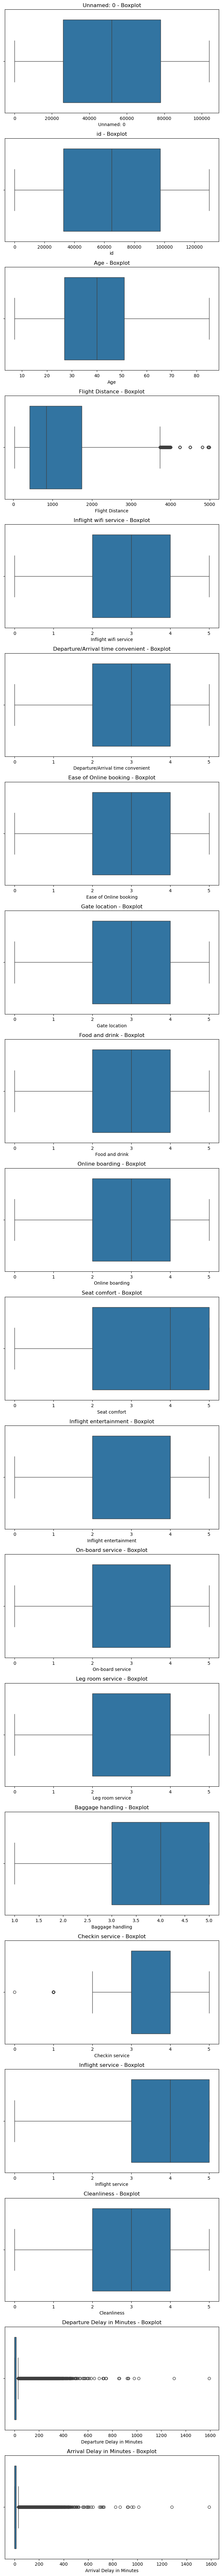

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

n = len(num_cols)
fig, axes = plt.subplots(nrows=n, figsize=(7, 4*n))

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"{col} - Boxplot")
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()


### Boxplot Yorumlayalım:

- **Unnamed:0 Dağılımı:**
  - 0 (Min) ile 100000(Max) arasında dağılım gösterdiği görülmektedir.
  - Q1 = 25000 civarında,  Q2 = 52000(median) civarında, Q3 = 78000 civarında olduğu görülmektedir.
  - Aykırı değer bulunmamaktadır.
  
- **id Dağılımı:**
  - 0 (Min) ile 130000(Max) arasında dağılım gösterdiği görülmektedir.
  - Q1 = 32000 civarında,  Q2 = 64000(median) civarında, Q3 = 95000 civarında olduğu görülmektedir.
  - Aykırı değer bulunmamaktadır.

- **Age Dağılımı:**
  - 7 (Min) ile 85(Max) arasında dağılım gösterdiği görülmektedir.
  - Q1 = 27 civarında,  Q2 = 40(median) civarında, Q3 = 52 civarında olduğu görülmektedir.
  - Aykırı değer bulunmamaktadır.

- **Flight Distance Dağılımı:**
  - 0 (Min) ile 3700(Max) arasında dağılım gösterdiği görülmektedir.
  - Q1 = 400 civarında,  Q2 = 800(median) civarında, Q3 = 1800 civarında olduğu görülmektedir.
  - Aykırı değer bulunmaktadır. 3700 üzerinde aykırı değerler olduğu görünmektedir.

- **Inflight wifi services Dağılımı:**
  - 0 (Min) ile 5(Max) arasında dağılım gösterdiği görülmektedir.
  - Q1 = 2 civarında,  Q2 = 3(median) civarında, Q3 = 4 civarında olduğu görülmektedir.
  - Aykırı değer bulunmamaktadır.

- **Departure/Arrival time convenient Dağılımı:**
  - 0 (Min) ile 5(Max) arasında dağılım gösterdiği görülmektedir.
  - Q1 = 2 civarında,  Q2 = 3(median) civarında, Q3 = 4 civarında olduğu görülmektedir.
  - Aykırı değer bulunmamaktadır.

- **Ease of Online booking Dağılımı:**
  - 0 (Min) ile 5(Max) arasında dağılım gösterdiği görülmektedir.
  - Q1 = 2 civarında,  Q2 = 3(median) civarında, Q3 = 4 civarında olduğu görülmektedir.
  - Aykırı değer bulunmamaktadır.

- **Gate location Dağılımı:**
  - 0 (Min) ile 5(Max) arasında dağılım gösterdiği görülmektedir.
  - Q1 = 2 civarında,  Q2 = 3(median) civarında, Q3 = 4 civarında olduğu görülmektedir.
  - Aykırı değer bulunmamaktadır.

- **Food and drink Dağılımı:**
  - 0 (Min) ile 5(Max) arasında dağılım gösterdiği görülmektedir.
  - Q1 = 2 civarında,  Q2 = 3(median) civarında, Q3 = 4 civarında olduğu görülmektedir.
  - Aykırı değer bulunmamaktadır.
  
- **Online boarding Dağılımı:**
  - 0 (Min) ile 5(Max) arasında dağılım gösterdiği görülmektedir.
  - Q1 = 2 civarında,  Q2 = 3(median) civarında, Q3 = 4 civarında olduğu görülmektedir.
  - Aykırı değer bulunmamaktadır.

- **Seat comfort Dağılımı:**
  - 0 (Min) ile 5(Max) arasında dağılım gösterdiği görülmektedir.
  - Q1 = 2 civarında,  Q2 = 4(median) civarında, Q3 = 5 civarında olduğu görülmektedir.
  - Aykırı değer bulunmamaktadır.
  
- **Inflight entertainment Dağılımı:**
  - 0 (Min) ile 5(Max) arasında dağılım gösterdiği görülmektedir.
  - Q1 = 2 civarında,  Q2 = 4(median) civarında, Q3 = 4 civarında olduğu görülmektedir.
  - Aykırı değer bulunmamaktadır.
  
- **On-board service Dağılımı:**
  - 0 (Min) ile 5(Max) arasında dağılım gösterdiği görülmektedir.
  - Q1 = 2 civarında,  Q2 = 4(median) civarında, Q3 = 4 civarında olduğu görülmektedir.
  - Aykırı değer bulunmamaktadır.

- **Leg room service Dağılımı:**
  - 0 (Min) ile 5(Max) arasında dağılım gösterdiği görülmektedir.
  - Q1 = 2 civarında,  Q2 = 4(median) civarında, Q3 = 4 civarında olduğu görülmektedir.
  - Aykırı değer bulunmamaktadır.

- **Baggeage handling Dağılımı:**
  - 0 (Min) ile 5(Max) arasında dağılım gösterdiği görülmektedir.
  - Q1 = 2 civarında,  Q2 = 4(median) civarında, Q3 = 5 civarında olduğu görülmektedir.
  - Aykırı değer bulunmamaktadır.
  
- **Checkin service Dağılımı:**
  - 2 (Min) ile 5(Max) arasında dağılım gösterdiği görülmektedir.
  - Q1 = 3 civarında,  Q2 = 3 (median) civarında, Q3 = 4 civarında olduğu görülmektedir.
  - Aykırı değer bulunmaktadır. 0 ve 2 arasında dağılım gösteriyor.

- **Inflight service Dağılımı:**
  - 0 (Min) ile 5(Max) arasında dağılım gösterdiği görülmektedir.
  - Q1 = 3 civarında,  Q2 = 4 (median) civarında, Q3 = 5 civarında olduğu görülmektedir.
  - Aykırı değer bulunmamaktadır.

- **Cleanliness Dağılımı:**
  - 0 (Min) ile 5(Max) arasında dağılım gösterdiği görülmektedir.
  - Q1 = 2 civarında,  Q2 = 3 (median) civarında, Q3 = 4 civarında olduğu görülmektedir.
  - Aykırı değer bulunmamaktadır.

- **Departure Delay in Minutes Dağılımı:**
  - 0 (Min) ile 30(Max) arasında dağılım gösterdiği görülmektedir.
  - Q1 = 0 civarında,  Q2 = 0 (median) civarında, Q3 = 12 civarında olduğu görülmektedir.
  - Aykırı değer bulunmaktadır. 35 ve 1600 arasında olduğu görülmektedir.


- **Arrival Delay in Minutes Dağılımı:**
  - 0 (Min) ile 30(Max) arasında dağılım gösterdiği görülmektedir.
  - Q1 = 0 civarında,  Q2 = 0 (median) civarında, Q3 = 13 civarında olduğu görülmektedir.
  - Aykırı değer bulunmaktadır. 35 ve 1600 arasında olduğu görülmektedir.


#### 4.2. IQR Yöntemiyle Aykırı Değer Analizi

In [26]:
# Aykırı değerleri tutmak için bir sözlük
outliers = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)            # Q1 hesaplama
    Q3 = df[col].quantile(0.75)            # Q3 hesaplama 
    IQR = Q3 - Q1                          # IQR değerini bulalım
    lower_bound = Q1 - 1.5 * IQR            # Alt sınır ve üst sınır değerlerini bulalım
    upper_bound = Q3 + 1.5 * IQR

    # Aykırı değerleri filtrele
    outlier_values = df[(df[col] < lower_bound) | (df[col] > upper_bound)]            # aykırı değerleri tespit edelim

    # Eğer aykırı değer varsa
    if not outlier_values.empty:                          # eğerki outlier değerleri boş değilse, bunları bir listeye ekleyelim
        outliers[col] = outlier_values.index.tolist() 
        print(f"{col} sütunundaki aykırı değerler:")
        print(outlier_values[[col]])
        print("-" * 50)

Flight Distance sütunundaki aykırı değerler:
        Flight Distance
80                 3960
173                3747
201                3854
215                3753
379                3995
...                 ...
103565             3881
103648             3890
103727             3990
103865             3795
103889             3885

[2291 rows x 1 columns]
--------------------------------------------------
Checkin service sütunundaki aykırı değerler:
        Checkin service
1                     1
3                     1
15                    1
30                    1
34                    1
...                 ...
103869                1
103887                1
103892                1
103893                1
103896                1

[12891 rows x 1 columns]
--------------------------------------------------
Departure Delay in Minutes sütunundaki aykırı değerler:
        Departure Delay in Minutes
14                              43
16                              49
22                  

**IQR Yorumlayalım:**

- **Flight Distance değeri:**
    - Flight Distance sütununda 2291 sütun değeri aykırı değer olarak belirlenmiştir.
- **Checkin service değeri:**
    - Checkin service sütununda 12891 sütun değeri aykırı değer olarak belirlenmiştir.
- **Departure Delay in Minutes değeri:**
    - Departure Delay in Minutes sütununda 14529 sütun değeri aykırı değer olarak belirlenmiştir.
- **Arrival Delay in Minutes değeri:**
    - Arrival Delay in Minutes sütununda 13954 sütun değeri aykırı değer olarak belirlenmiştir.
    
**Yukarıda gösterimine yer verdiğimiz aykırı değerler ya veriden çıkarılacaktır ya da Winsorizing yöntemiyle aykırı değerleri baskılama yöntemi uygulanabilir.**

### **5. Görselleştirme Sayısal ve kategorik değişkenler için uygun grafik türleri kullanılarak veriler görselleştirilir.**

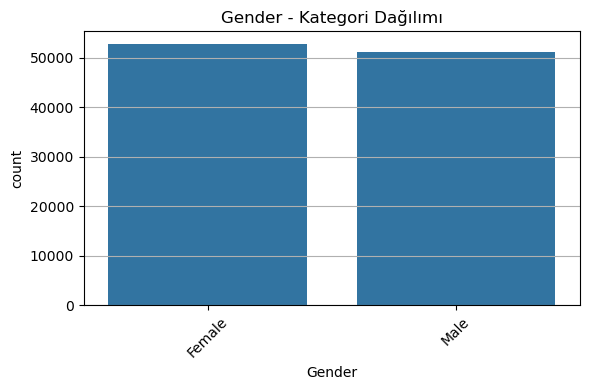

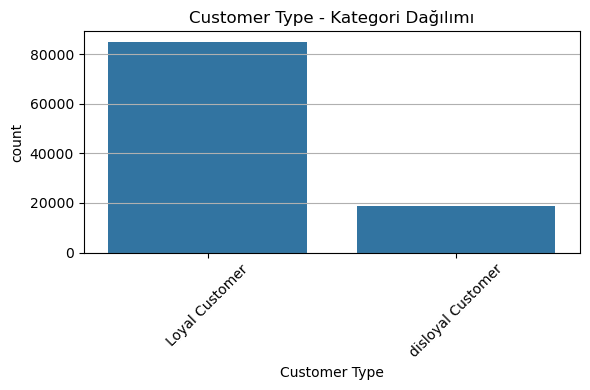

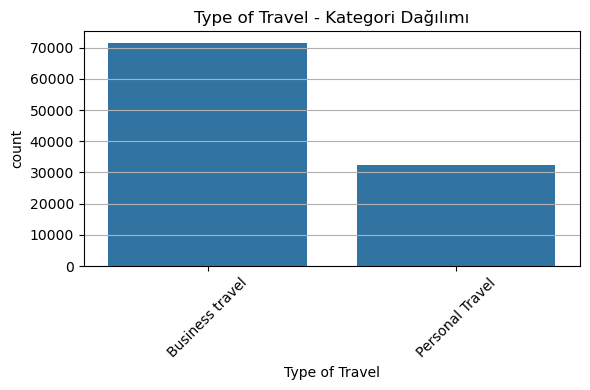

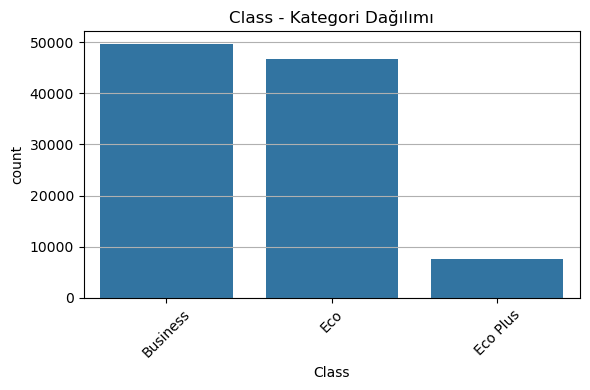

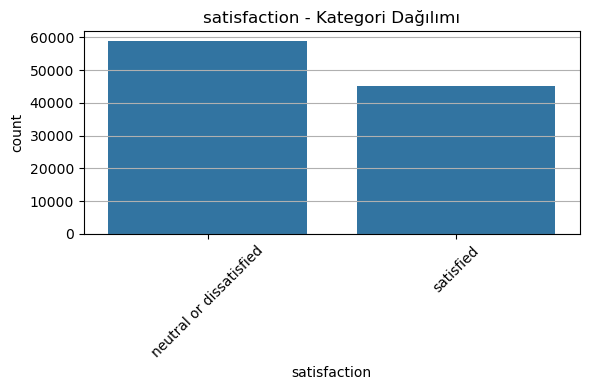

In [47]:
# Kategorik değişkenler için görselleştirme yapalım.

for col in cat_cols:
    plt.figure(figsize=(6, 4))                                        # boyutlarını verelim.
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)   
    plt.title(f"{col} - Kategori Dağılımı")                            # başlık verir.
    plt.xticks(rotation=45)                                            # x eksenindekilere 45 derece rotasyon verelim.
    plt.grid(axis="y")                                                 # arkadaki ızgaraları ekler.
    plt.tight_layout()                                                
    plt.show()

#### Kategorik değişkenler için yorumlama:
- Gender Dağılımı'nda neredeydse eşit bir dağılım olduğunu görmekteyiz.
- Customer Type Dağılımı'nda Sadık olanların sayısının bir hayli fazla olduğu görülmekte. Eşit bir dağılım söz konusu değildir.
- Type of Travel Dağılımı'nda İş için seyahat edenler, kişisel seyahatlere göre 2 katı daha fazladır. Eşit bir dağılım söz konusu değildir.
- Class Dağılımı'nda Business bölümünde seyahat edenler en fazladır. Ardından onu Eco takip etmektedir, Eco Plus en az tercih edilen sınıftır.
- satisfaticon Dağılımı'nda nötr veya memnun olamayanların sayısı, memnun olanlardan fazladır.


Text(0.5, 1.0, 'Memnuniyet Dağılımı')

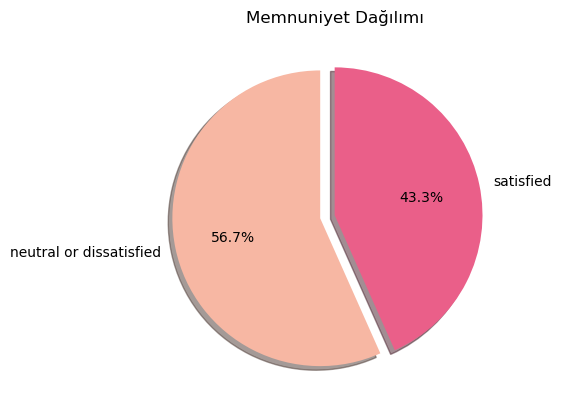

In [58]:
# Pie Chart ile memnuniyet dağılımını inceleyelim.

plt.pie(df['satisfaction'].value_counts(),labels=df['satisfaction'].value_counts().index,autopct='%1.1f%%',colors=c,startangle=90,explode=[0.1,0],shadow=True)


plt.title('Memnuniyet Dağılımı')      # başlık veriyoruz.

#### Memnuniyet Dağılımı grafiğini yorumlayalım:

Bu grafik bize verideki genel memnun olanlar ve nötr veya memnun olmayanların dağılımını vermektedir.

- %56.7 = nötr veya memnun olmayanlar
- %43.3 = memnun olanların dağılımını vermektedir.

Burada eşit bir dağılım söz konusu değildir. Makine öğrenmesi modeli kurarken bu aradaki dengesizlik giderilmesi adına dengeleme teknikleri kullanılabilir.

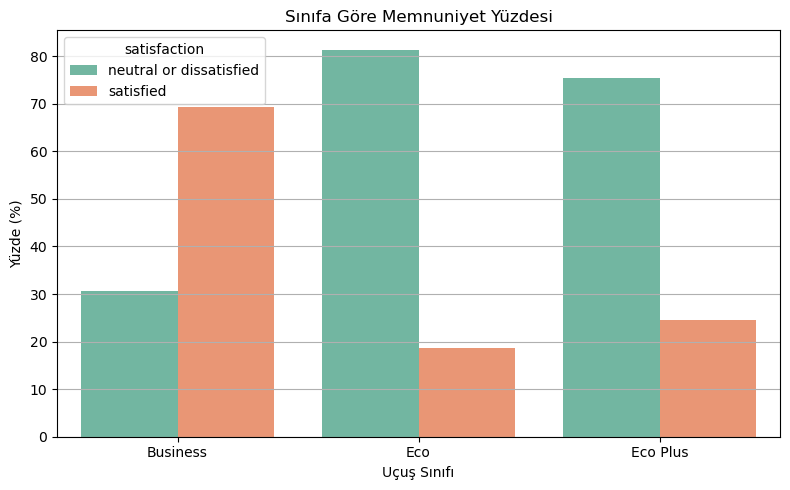

In [54]:
# Sınıf'a göre memnuniyet yüzdesine bakalım.

grouped = df.groupby(["Class", "satisfaction"]).size().reset_index(name="count")
grouped["percent"] = grouped.groupby("Class")["count"].transform(lambda x: 100 * x / x.sum())

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x="Class", y="percent", hue="satisfaction", palette="Set2")
plt.title("Sınıfa Göre Memnuniyet Yüzdesi")
plt.ylabel("Yüzde (%)")
plt.xlabel("Uçuş Sınıfı")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


#### Sınıfa Göre Memnuniye Yüzdesi grafiğini yorumlayalım:

- En çok memnun sınıf : Business (yaklaşık %70 oranında)
- En az memnun sınıf : Eco (yaklaşık %82 oranında) ve arkasından onu Eco Plus (yaklasık %75 oranında) sınıfı takip etmektedir.

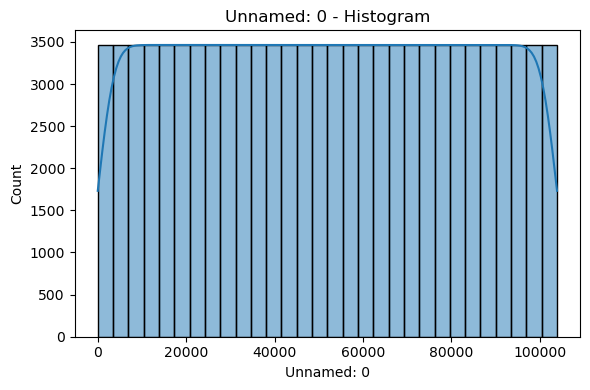

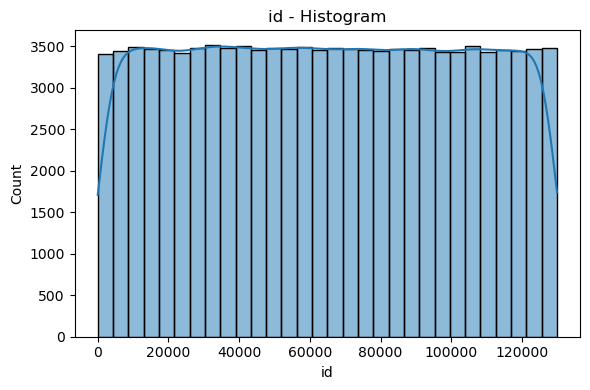

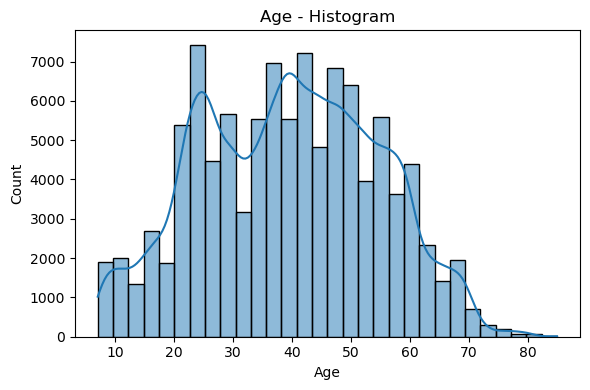

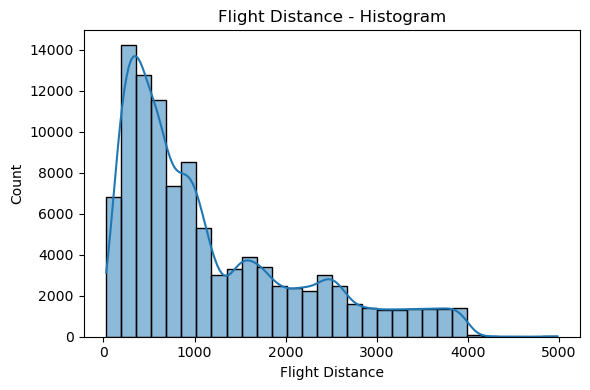

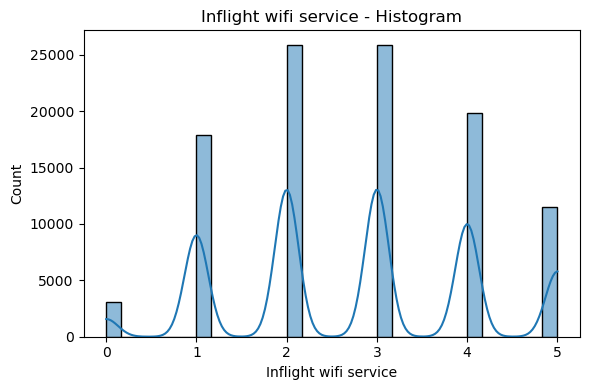

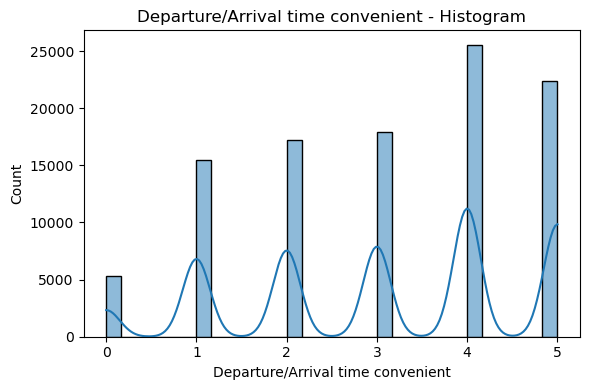

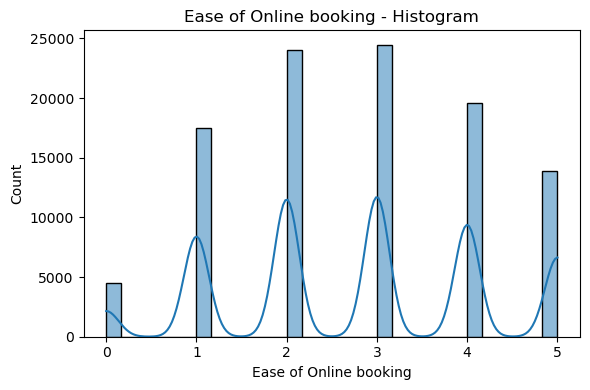

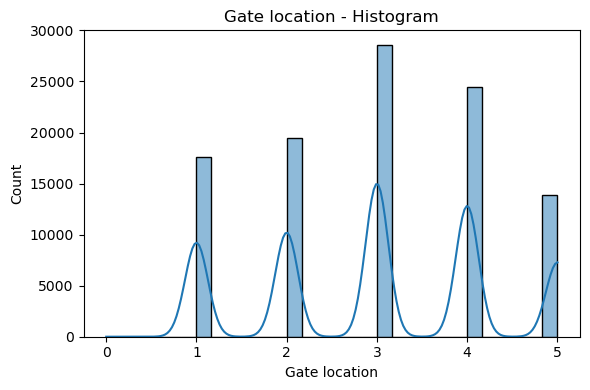

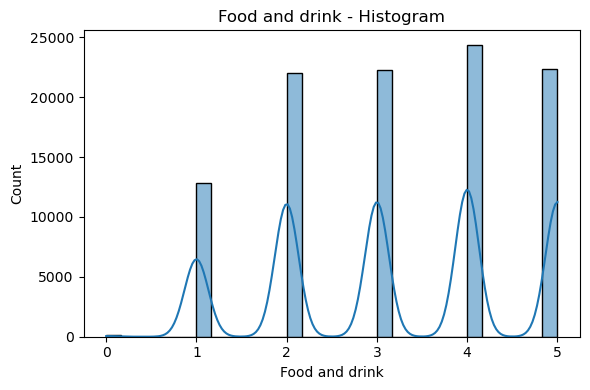

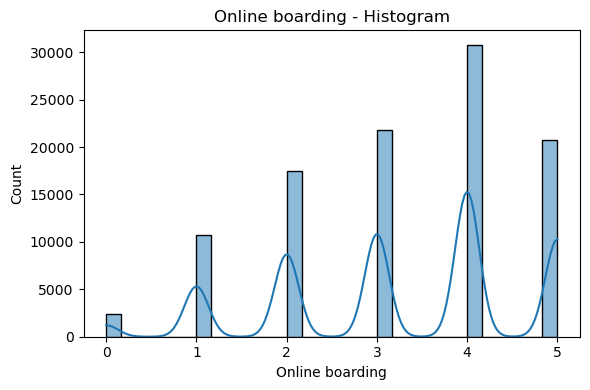

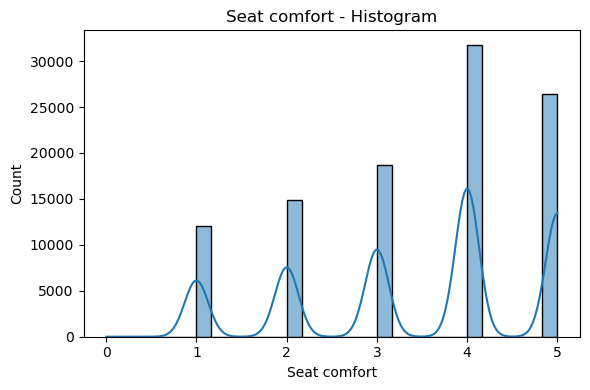

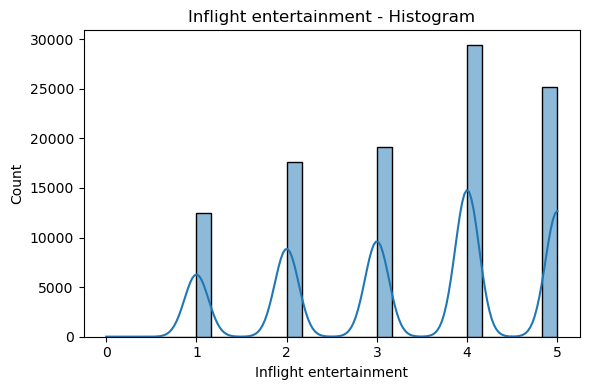

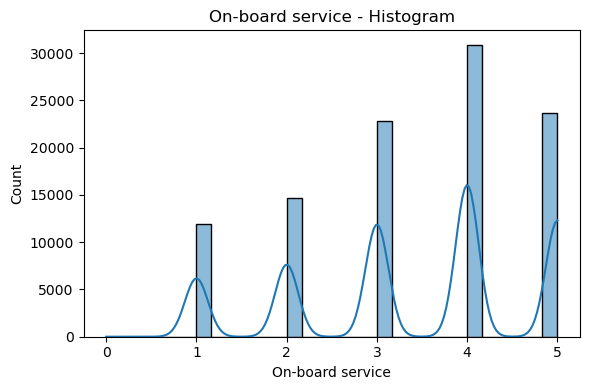

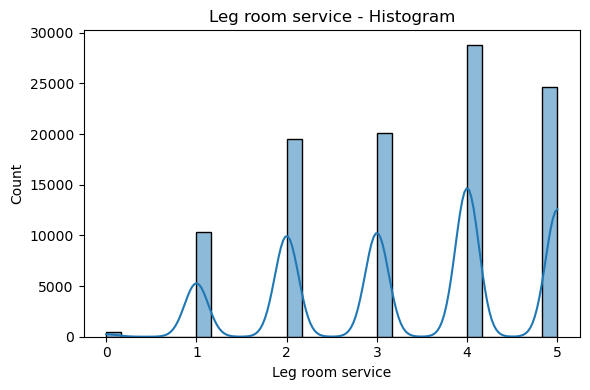

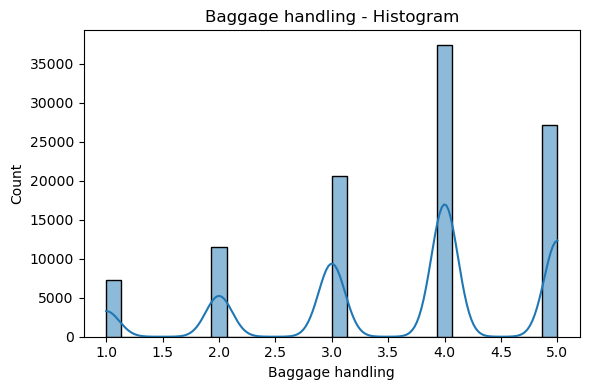

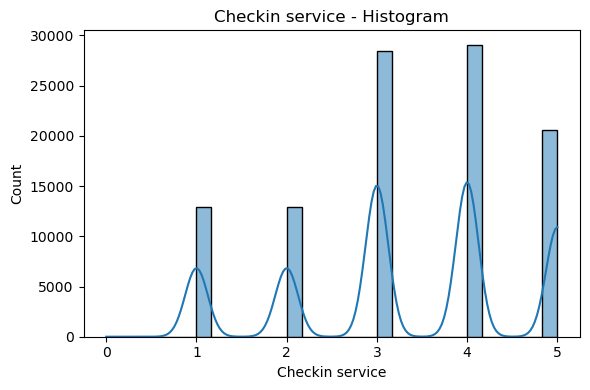

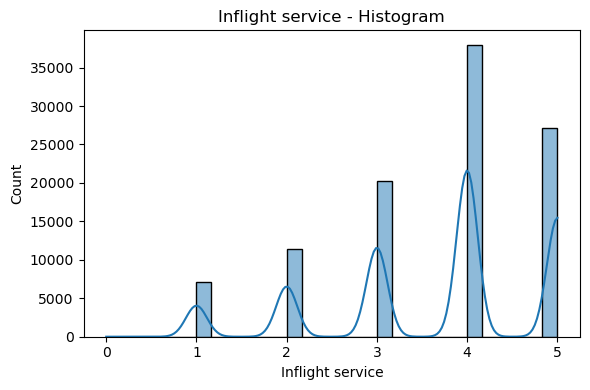

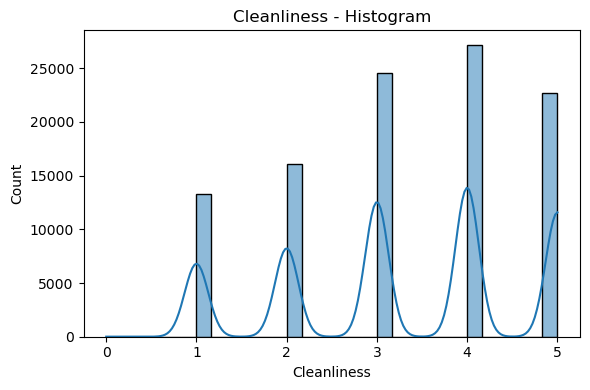

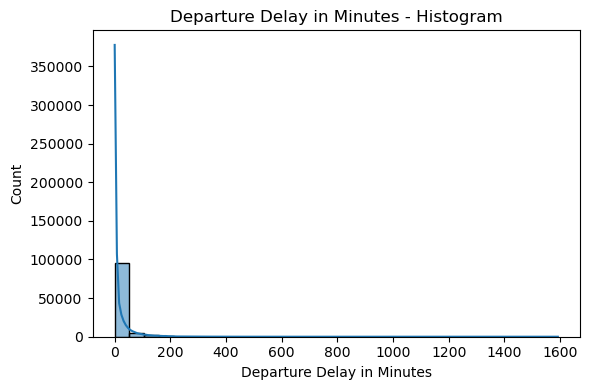

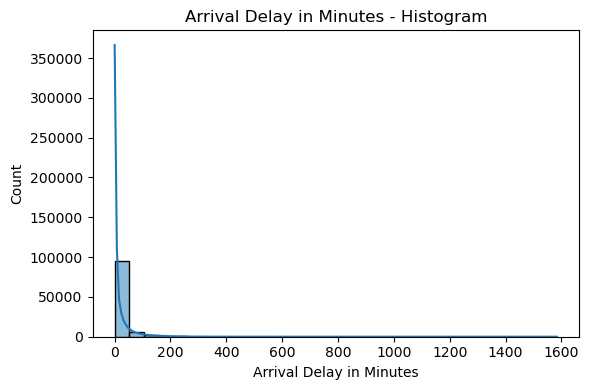

In [30]:
# numeric sütunların görselleştirilmesi - Histplot

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, bins=30, kde=True)
    plt.title(f"{col} - Histogram")
    plt.tight_layout()
    plt.show()


#### Numeric sütunları Yorumlayalım:

- Age sütununda neredeyse Simetrik bir dağılım söz konusudur.
- Flight Distance, Departure Delay in Minutes ve Arrival Delay in Minutes sütunlarında sağa çarpık bir dağılım söz konusudur. Ve aykırı değerler bulunmaktadır.
- Diğer tüm sütunlar için simetrik dağılım söz konusudur.

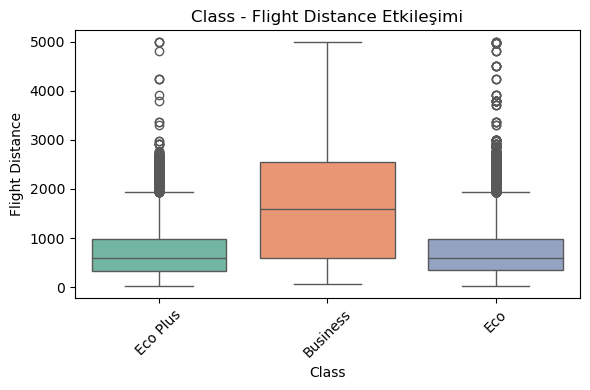

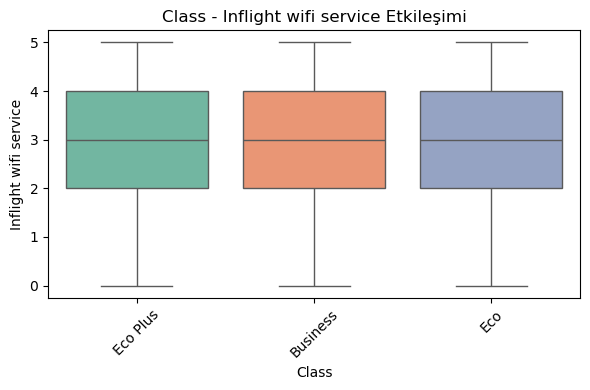

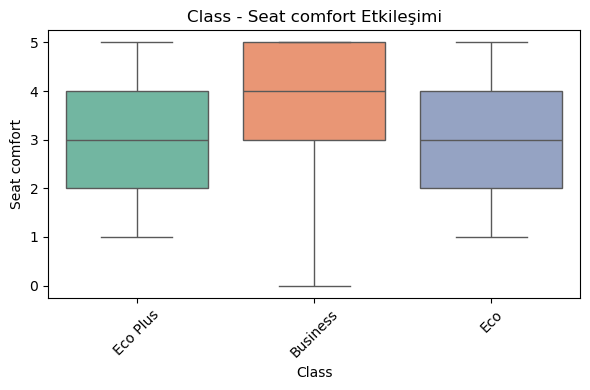

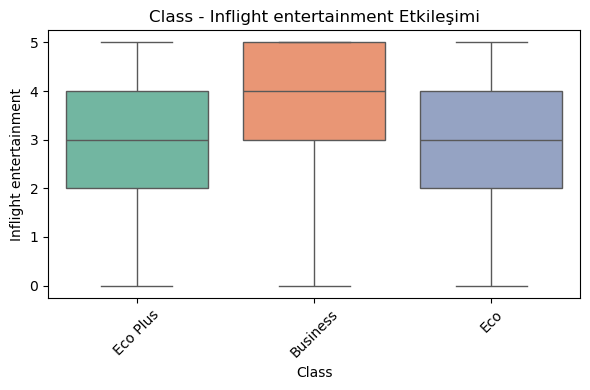

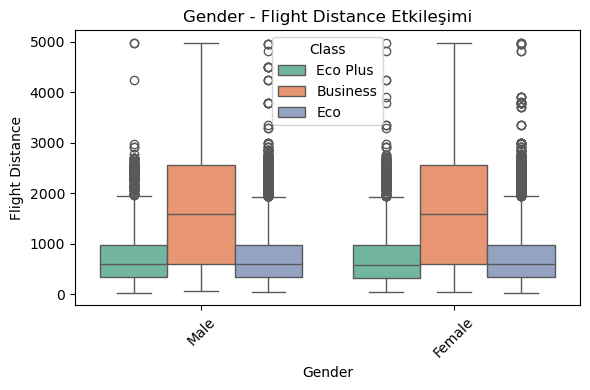

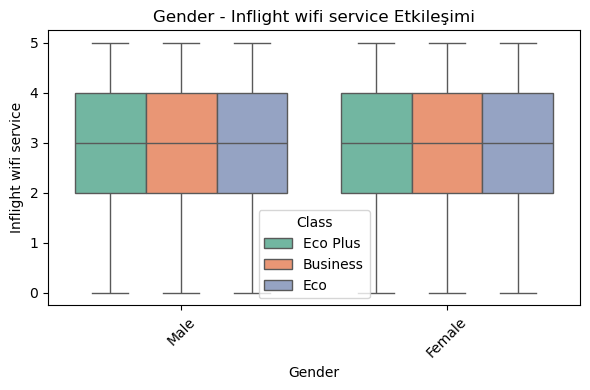

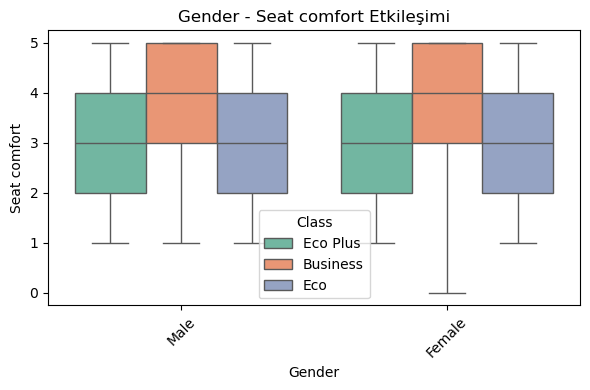

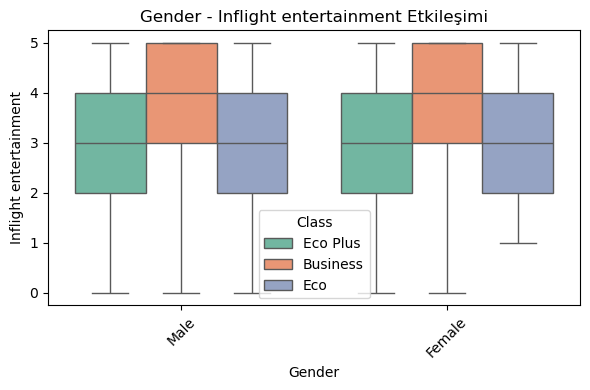

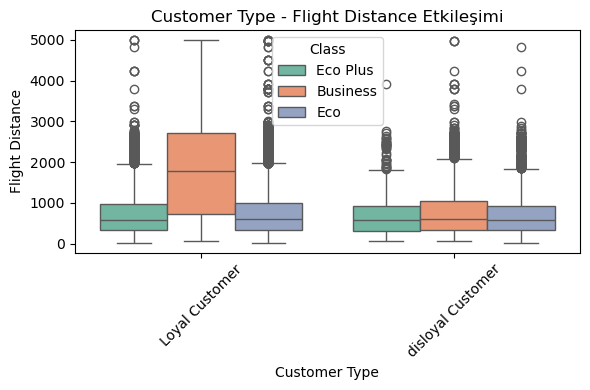

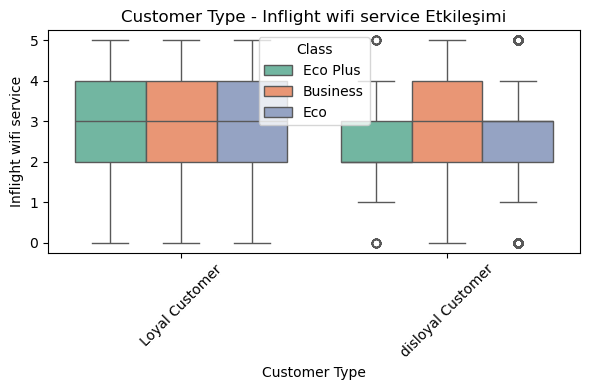

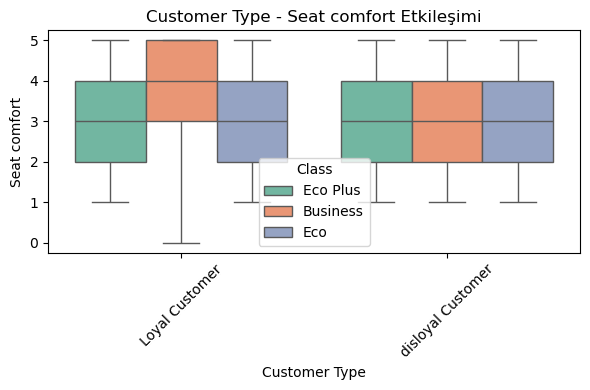

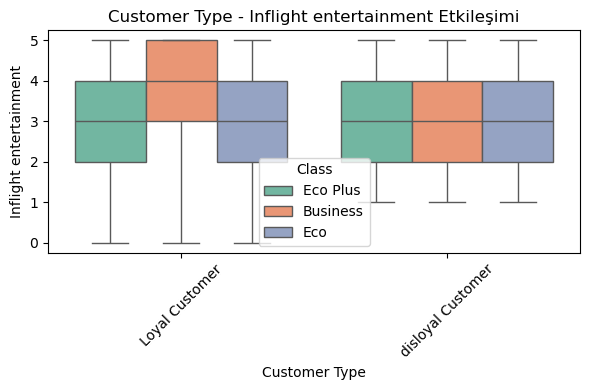

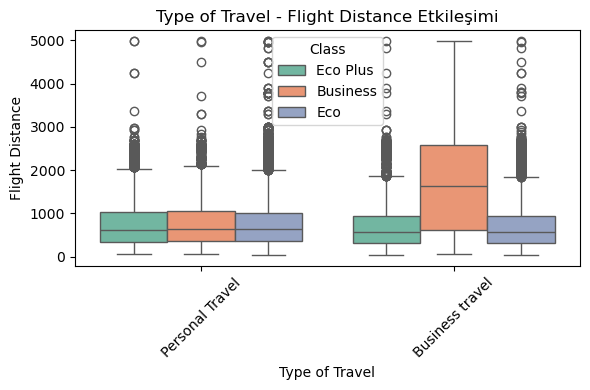

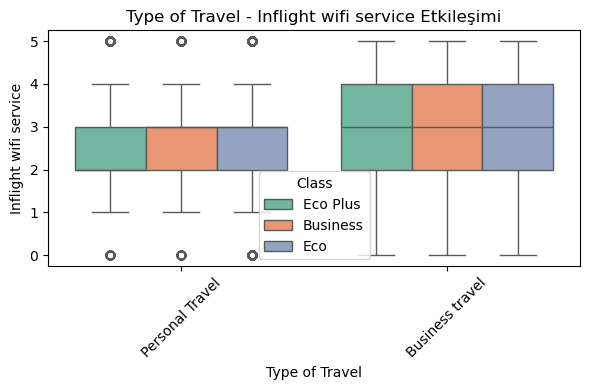

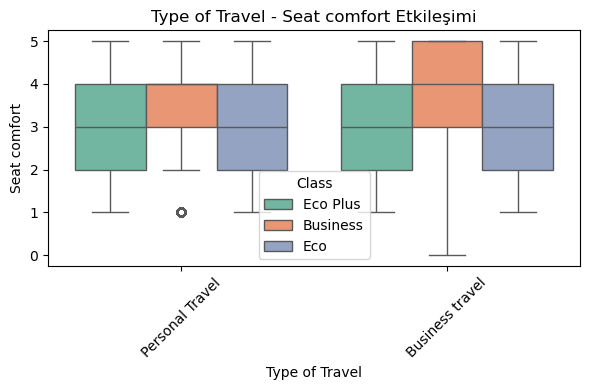

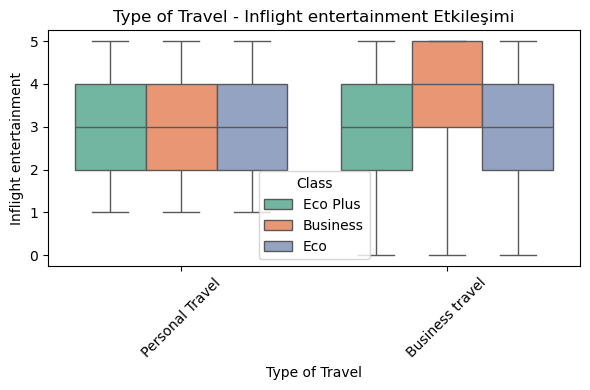

In [50]:
# Kategorik & Sayısal Etkileşim (Gruplu Boxplot)

for cat in ['Class', 'Gender', 'Customer Type', 'Type of Travel']:
    for num in ['Flight Distance', 'Inflight wifi service', 'Seat comfort', 'Inflight entertainment']:
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df, hue=df["Class"], x=cat, y=num, palette="Set2")
        plt.title(f"{cat} - {num} Etkileşimi")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


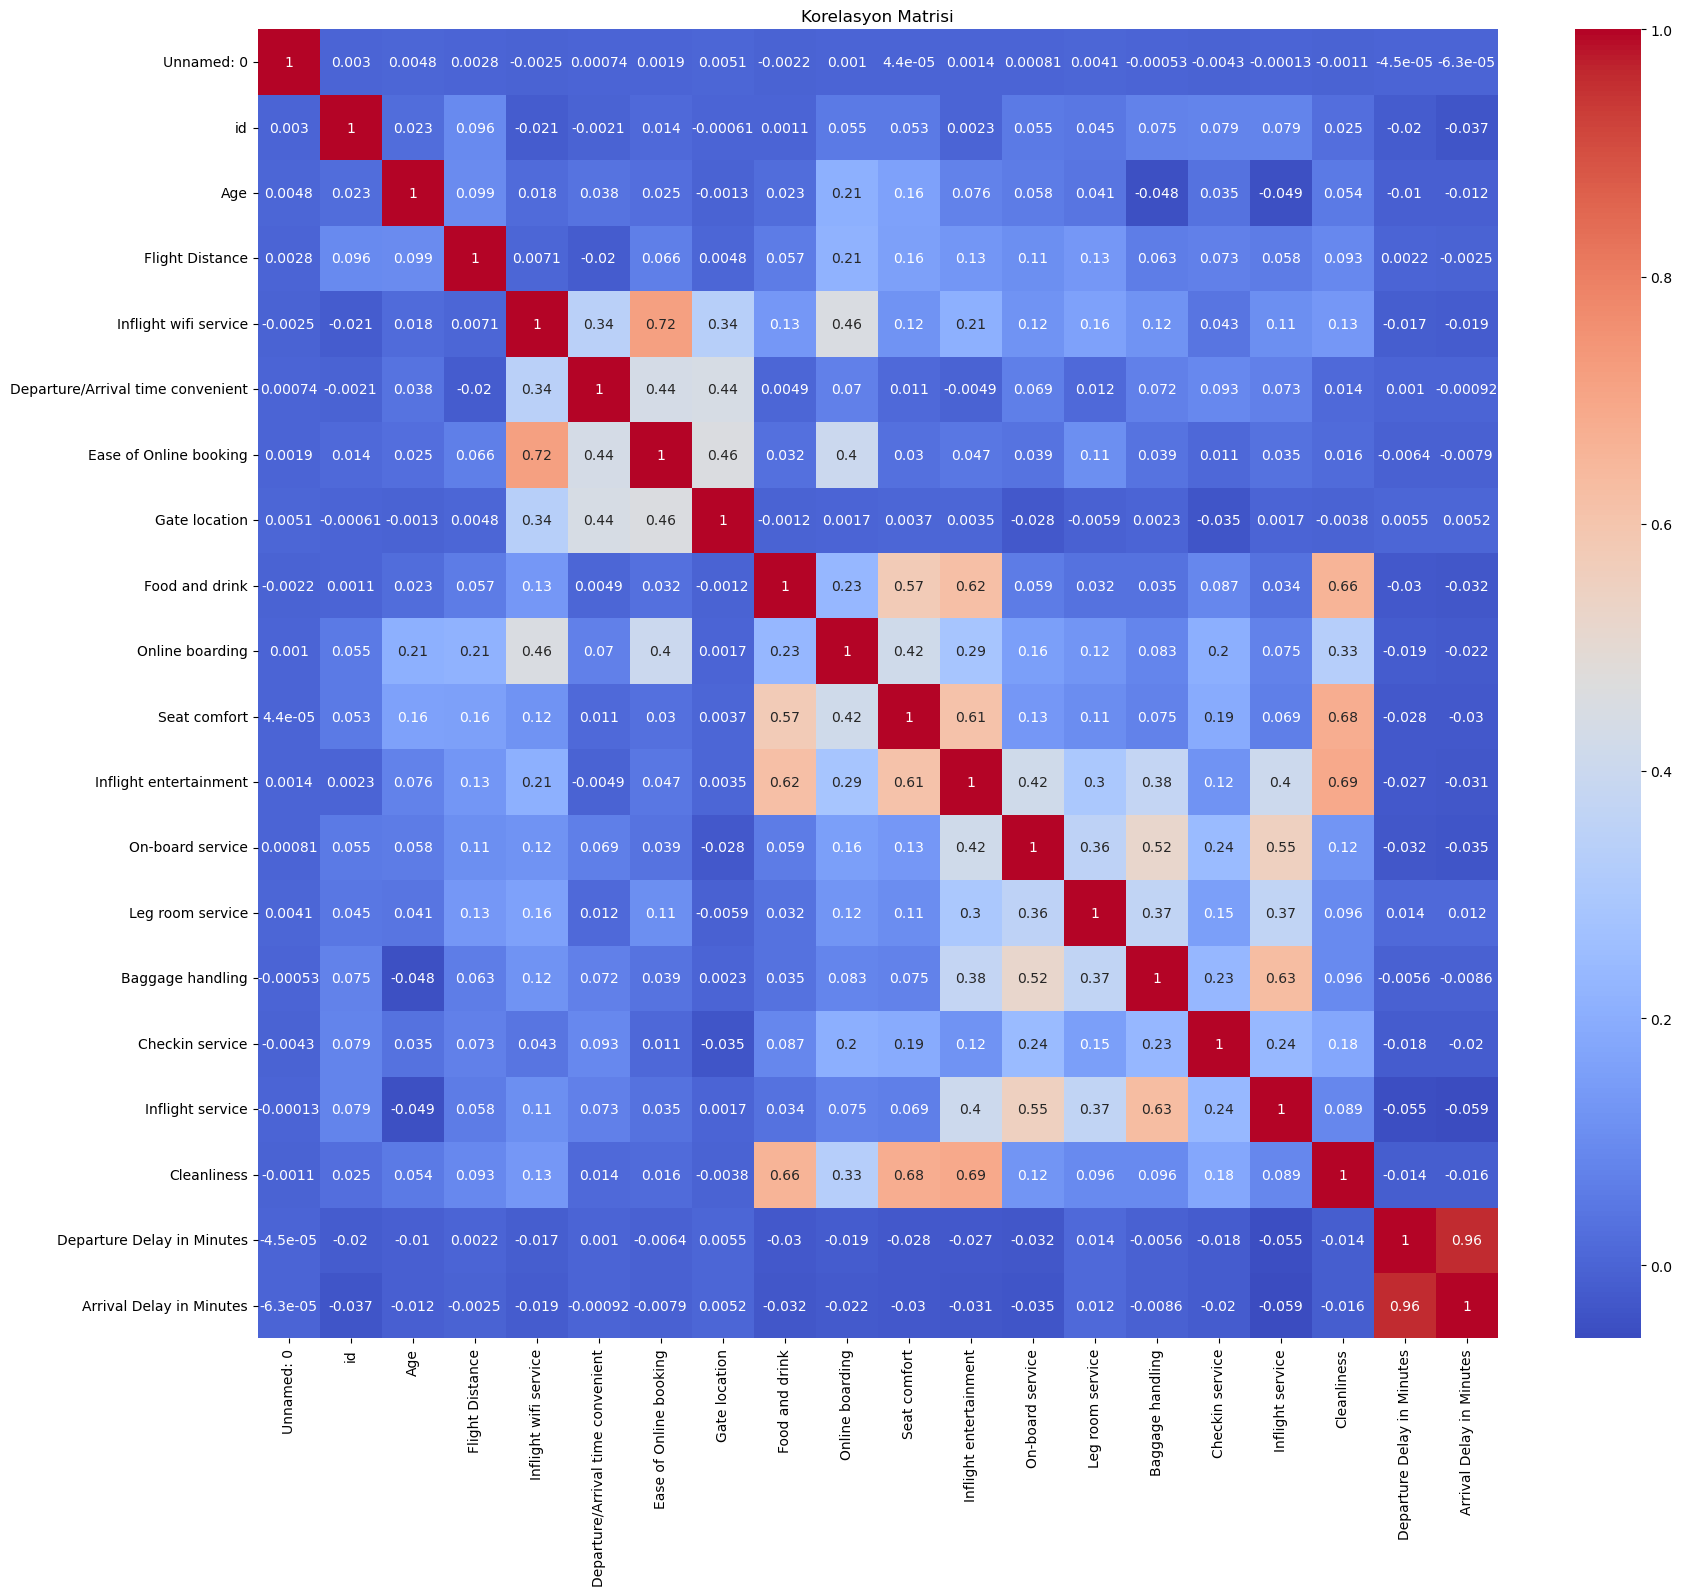

In [53]:
# Korelasyon Matrisi ile değişkenlerin arasındaki ilişkileri yorumlayalım

corr = df.corr(numeric_only=True)
plt.figure(figsize=(20, 17))  
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()

#### Korelasyon Yorumlayalım:
- **Aralarında Pozitif korelasyon bulunan değişkenler aşağıdaki gibidir.**
    - Ease of Online booking - Inflight wifi services (+0.72)
    - Seat comfort - Food and drink (+0.57)
    - Inflight entertainment - Food and drink (+0.62)
    - Cleanliness - Food and drink (+0.66)
    - Inflight entertainment - Seat comfort (+0.61)
    - Cleanliness - Seat comfort(+0.68)
    - Cleanliness - Inflight entertainment (+0.69)
    - Baggage handling - On-based service (+0.52)
    - Inflight service - On-based service (+0.55)
    - Inflight service - Baggage handling (+0.63)

### **6. Teslim Formatı**
- GitHub: Katılımcılar çalışmalarını kendi GitHub hesapları üzerinden private olarak paylaşıp deadline sonrası public hale getirebilirler. GitHub linklerini cohort üzerinden ilgili yere paylaşmaları beklenir.
- Classroom Assignment: Tüm katılımcılar çalışmalarını Classroom üzerinden teslim eder.